In [1]:
### Import
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle
%matplotlib inline

In [2]:
### Chessboard Corners

# Prepare object points
nx = 9
ny = 6
objp = np.zeros((nx*ny,3), np.float32)
objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)

# Object points and Image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# List of calibration images
images = glob.glob('camera_cal/calibration*.jpg')
chessboard_corners = []


for idx, fname in enumerate(images):
    image = mpimg.imread(fname)
    
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Find chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None)
    
    # If found, add object points, image points
    if ret == True:
        
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        chessboard_corners.append(cv2.drawChessboardCorners(image, (nx,ny), corners, ret))
    else:
        chessboard_corners.append(image)

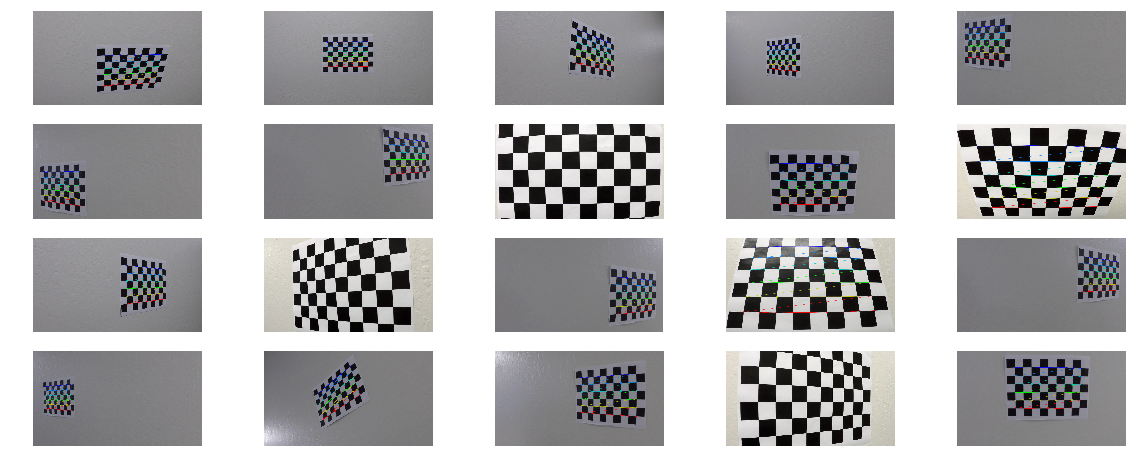

In [3]:
# Create subplots in figure
fig = plt.figure(figsize=(20, 8))
for r in range(1,len(chessboard_corners)+1):
    fig.add_subplot(4,5,r)
    plt.imshow(chessboard_corners[r-1])
    plt.axis('off')
plt.show()

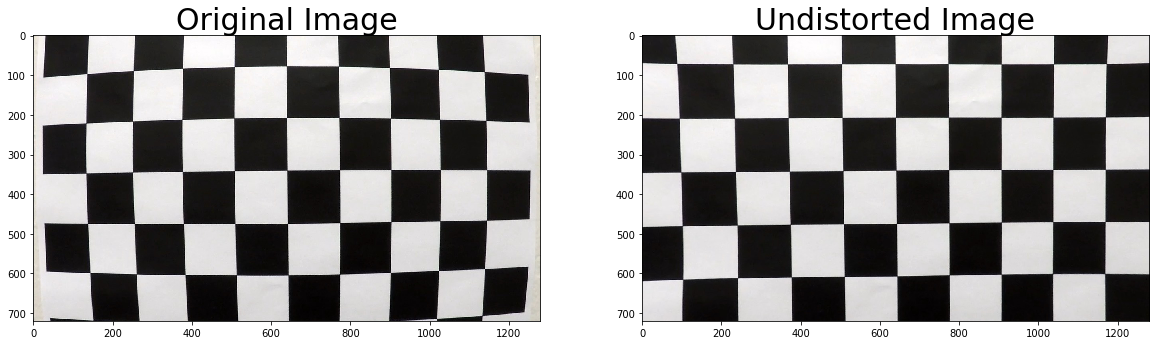

In [4]:
### Camera Calibration
img = mpimg.imread('camera_cal/calibration1.jpg')
img_size = (img.shape[1], img.shape[0])

# Calibrate Camera
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size, None, None)

# Undistort Test Image
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
undist_image = cv2.undistort(img, mtx, dist, None, mtx)
ax1.imshow(img)
ax2.imshow(undist_image)
ax1.set_title('Original Image', fontsize=30)
ax2.set_title('Undistorted Image', fontsize=30)
plt.show();

In [5]:
# Save the camera calibration result
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open( "dist_pickle.p", "wb" ) )
